In [2]:
import pandas as pd
import numpy as np
import geopandas as gp
import matplotlib.pylab as pl
from fiona.crs import from_epsg
import fiona
from matplotlib import colors
import shapely
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap    
%matplotlib inline
pd.set_option('display.height',1000)
pd.set_option('display.max_row',500)
pd.set_option('display.max_columns',500)
pd.set_option("display.width", 1000)

height has been deprecated.



### Objective
The objective of this notebook is to aggregate the data from the Census Bureau by Water District


In [3]:
inc = gp.GeoDataFrame.from_file('../Data/Supplier/Household_Income_Water_District.geojson')

In [4]:
inc.head(3)

,Estimate; Total:,"Estimate; Total: - $10,000 to $14,999","Estimate; Total: - $100,000 to $124,999","Estimate; Total: - $125,000 to $149,999","Estimate; Total: - $15,000 to $19,999","Estimate; Total: - $150,000 to $199,999","Estimate; Total: - $20,000 to $24,999","Estimate; Total: - $200,000 or more","Estimate; Total: - $25,000 to $29,999","Estimate; Total: - $30,000 to $34,999","Estimate; Total: - $35,000 to $39,999","Estimate; Total: - $40,000 to $44,999","Estimate; Total: - $45,000 to $49,999","Estimate; Total: - $50,000 to $59,999","Estimate; Total: - $60,000 to $74,999","Estimate; Total: - $75,000 to $99,999","Estimate; Total: - Less than $10,000",Margin of Error; Total:,"Margin of Error; Total: - $10,000 to $14,999","Margin of Error; Total: - $100,000 to $124,999","Margin of Error; Total: - $125,000 to $149,999","Margin of Error; Total: - $15,000 to $19,999","Margin of Error; Total: - $150,000 to $199,999","Margin of Error; Total: - $20,000 to $24,999","Margin of Error; Total: - $200,000 or more","Margin of Error; Total: - $25,000 to $29,999","Margin of Error; Total: - $30,000 to $34,999","Margin of Error; Total: - $35,000 to $39,999","Margin of Error; Total: - $40,000 to $44,999","Margin of Error; Total: - $45,000 to $49,999","Margin of Error; Total: - $50,000 to $59,999","Margin of Error; Total: - $60,000 to $74,999","Margin of Error; Total: - $75,000 to $99,999","Margin of Error; Total: - Less than $10,000",Median Household Income,Median Household Income Count,PWSID,"Per_Estimate; Total: - $10,000 to $14,999","Per_Estimate; Total: - $100,000 to $124,999","Per_Estimate; Total: - $125,000 to $149,999","Per_Estimate; Total: - $15,000 to $19,999","Per_Estimate; Total: - $150,000 to $199,999","Per_Estimate; Total: - $20,000 to $24,999","Per_Estimate; Total: - $200,000 or more","Per_Estimate; Total: - $25,000 to $29,999","Per_Estimate; Total: - $30,000 to $34,999","Per_Estimate; Total: - $35,000 to $39,999","Per_Estimate; Total: - $40,000 to $44,999","Per_Estimate; Total: - $45,000 to $49,999","Per_Estimate; Total: - $50,000 to $59,999","Per_Estimate; Total: - $60,000 to $74,999","Per_Estimate; Total: - $75,000 to $99,999","Per_Estimate; Total: - Less than $10,000",Per_Margin of Error; Total:,"Per_Margin of Error; Total: - $10,000 to $14,999","Per_Margin of Error; Total: - $100,000 to $124,999","Per_Margin of Error; Total: - $125,000 to $149,999","Per_Margin of Error; Total: - $15,000 to $19,999","Per_Margin of Error; Total: - $150,000 to $199,999","Per_Margin of Error; Total: - $20,000 to $24,999","Per_Margin of Error; Total: - $200,000 or more","Per_Margin of Error; Total: - $25,000 to $29,999","Per_Margin of Error; Total: - $30,000 to $34,999","Per_Margin of Error; Total: - $35,000 to $39,999","Per_Margin of Error; Total: - $40,000 to $44,999","Per_Margin of Error; Total: - $45,000 to $49,999","Per_Margin of Error; Total: - $50,000 to $59,999","Per_Margin of Error; Total: - $60,000 to $74,999","Per_Margin of Error; Total: - $75,000 to $99,999","Per_Margin of Error; Total: - Less than $10,000",geometry,id,supplier_n
0,23985,496,2737,2089,680,3561,740,3963,542,636,656,650,763,1507,1432,2916,617,3551,781,1757,1584,895,1981,943,1825,815,926,899,945,1059,1502,1301,2019,895,"Estimate; Total: - $125,000 to $149,999",59.920784,CA0105008,2.067959,11.411299,8.709610,2.835105,14.846779,3.085262,16.522827,2.259746,2.651657,2.735043,2.710027,3.181155,6.283094,5.970398,12.157598,2.572441,14.805087,3.256202,7.325412,6.604128,3.731499,8.259329,3.931624,7.608922,3.397957,3.860746,3.748176,3.939962,4.415260,6.262247,5.424223,8.417761,3.731499,"(POLYGON ((-121.804593 37.700265, -121.804565 ...",0,California Water Service Company Livermore
1,105006,2329,13440,10169,1894,14691,2571,17365,2556,2540,2487,2484,2646,5453,7825,13910,2646,15484,3485,8539,7341,3283,8776,3785,8564,3815,3736,3695,3607,3777,5276,6584,8638,3696,"Estimate; Total: - $125,000 to $149,999",59.788012,CA0110001,2.217968,12.799269,9.684209,1.803706,13.990629,2.448432,16.53715

In [5]:
total_col = [u'Estimate; Total:',
 u'Estimate; Total: - Less than $10,000',
 u'Estimate; Total: - $10,000 to $14,999',
 u'Estimate; Total: - $15,000 to $19,999',
 u'Estimate; Total: - $20,000 to $24,999',
 u'Estimate; Total: - $25,000 to $29,999',
 u'Estimate; Total: - $30,000 to $34,999',
 u'Estimate; Total: - $35,000 to $39,999',
 u'Estimate; Total: - $40,000 to $44,999',
 u'Estimate; Total: - $45,000 to $49,999',
 u'Estimate; Total: - $50,000 to $59,999',
 u'Estimate; Total: - $60,000 to $74,999',
 u'Estimate; Total: - $75,000 to $99,999',
 u'Estimate; Total: - $100,000 to $124,999',
 u'Estimate; Total: - $125,000 to $149,999',
 u'Estimate; Total: - $150,000 to $199,999',
 u'Estimate; Total: - $200,000 or more',
 u'PWSID',
]

In [6]:
tot_in = inc[total_col]

In [7]:
tot_in[u'Estimate; Total:'].shape

(401L,)

In [8]:
tot_in.shape

(401, 18)

In [9]:
tot_in.dtypes

Estimate; Total:                            int64
Estimate; Total: - Less than $10,000        int64
Estimate; Total: - $10,000 to $14,999       int64
Estimate; Total: - $15,000 to $19,999       int64
Estimate; Total: - $20,000 to $24,999       int64
Estimate; Total: - $25,000 to $29,999       int64
Estimate; Total: - $30,000 to $34,999       int64
Estimate; Total: - $35,000 to $39,999       int64
Estimate; Total: - $40,000 to $44,999       int64
Estimate; Total: - $45,000 to $49,999       int64
Estimate; Total: - $50,000 to $59,999       int64
Estimate; Total: - $60,000 to $74,999       int64
Estimate; Total: - $75,000 to $99,999       int64
Estimate; Total: - $100,000 to $124,999     int64
Estimate; Total: - $125,000 to $149,999     int64
Estimate; Total: - $150,000 to $199,999     int64
Estimate; Total: - $200,000 or more         int64
PWSID                                      object
dtype: object

In [10]:
nor_tot_in =tot_in.copy(deep = True)

In [11]:
for ind in tot_in.index:
    nor_tot_in.loc[ind] = tot_in.loc[ind][:-1]/tot_in.loc[ind,u'Estimate; Total:']

In [12]:
nor_tot_in['PWSID'] = tot_in['PWSID'] 
nor_tot_in.head()

,Estimate; Total:,"Estimate; Total: - Less than $10,000","Estimate; Total: - $10,000 to $14,999","Estimate; Total: - $15,000 to $19,999","Estimate; Total: - $20,000 to $24,999","Estimate; Total: - $25,000 to $29,999","Estimate; Total: - $30,000 to $34,999","Estimate; Total: - $35,000 to $39,999","Estimate; Total: - $40,000 to $44,999","Estimate; Total: - $45,000 to $49,999","Estimate; Total: - $50,000 to $59,999","Estimate; Total: - $60,000 to $74,999","Estimate; Total: - $75,000 to $99,999","Estimate; Total: - $100,000 to $124,999","Estimate; Total: - $125,000 to $149,999","Estimate; Total: - $150,000 to $199,999","Estimate; Total: - $200,000 or more",PWSID
0,1.0,0.025724,0.020680,0.028351,0.030853,0.022597,0.026517,0.027350,0.027100,0.031812,0.062831,0.059704,0.121576,0.114113,0.087096,0.148468,0.165228,CA0105008
1,1.0,0.025199,0.022180,0.018037,0.024484,0.024341,0.024189,0.023684,0.023656,0.025199,0.051930,0.074520,0.132469,0.127993,0.096842,0.139906,0.165372,CA0110001
2,1.0,0.057053,0.048413,0.037411,0.039599,0.035868,0.036678,0.033822,0.036196,0.032847,0.065295,0.087396,0.115385,0.092065,0.066237,0.087572,0.128164,CA0110005
3,1.0,0.048123,0.042155,0.046753,0.037900,0.034817,0.040893,0.038549,0.041470,0.042263,0.078703,0.112311,0.136760,0.108994,0.064927,0.069832,0.055552,CA0110006
4,1.0,0.022975,0.020479,0.018070,0.019189,0.020866,0.017468,0.019189,0.020178,0.016564,0.036441,0.062729,0.107086,0.112722,0.099213,0.154025,0.252807,CA0110008


In [13]:
nor_tot_in.iloc[::,1::].sum(axis=1).unique().tolist()

[1.0, 0.9999999999999998, 0.9999999999999999, 1.0000000000000002]

In [14]:
nor_tot_in.iloc[::,1::].shape[1]-1

16

In [15]:
range(nor_tot_in.iloc[::,1::].shape[1])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [16]:
nor_tot_in['Medium'] = ''
nor_tot_in['Medium_val'] = np.nan
cat = nor_tot_in.iloc[::,1::].shape[1]-3
thecol= nor_tot_in.iloc[::,1::].columns.tolist()
for i in nor_tot_in.iloc[::,1::].index:
    #print 'index', i
    for bra in range(cat+1):
        #print 'cat', bra
        #print bra
        if nor_tot_in.loc[i,u'Estimate; Total: - $200,000 or more']>= 0.5:
            nor_tot_in.loc[i,'Medium'] = u'Estimate; Total: - $200,000 or more'
            nor_tot_in.loc[i,'Medium_val'] = nor_tot_in.loc[i,u'Estimate; Total: - $200,000 or more']
            break

        if nor_tot_in.loc[i][1:bra].sum() >= 0.5:
            nor_tot_in.loc[i,'Medium'] = thecol[bra-2]
            #print thecol[bra-2], '==', nor_tot_in.loc[i][bra-1:bra].index[0]
            nor_tot_in.loc[i,'Medium_val'] = nor_tot_in.loc[i][1:bra].sum()
            break

In [17]:
nor_tot_in['Medium'].unique().tolist()

[u'Estimate; Total: - $100,000 to $124,999',
 u'Estimate; Total: - $60,000 to $74,999',
 u'Estimate; Total: - $125,000 to $149,999',
 u'Estimate; Total: - $75,000 to $99,999',
 u'Estimate; Total: - $40,000 to $44,999',
 u'Estimate; Total: - $25,000 to $29,999',
 u'Estimate; Total: - $45,000 to $49,999',
 u'Estimate; Total: - $50,000 to $59,999',
 u'Estimate; Total: - $30,000 to $34,999',
 u'Estimate; Total: - $35,000 to $39,999',
 u'Estimate; Total: - $150,000 to $199,999',
 u'Estimate; Total: - $15,000 to $19,999',
 u'Estimate; Total: - $20,000 to $24,999',
 u'Estimate; Total: - $200,000 or more']

In [18]:
nor_tot_in.groupby('Medium').count().iloc[::,:1:].sort_values('Estimate; Total:')

,Estimate; Total:
Medium,
"Estimate; Total: - $15,000 to $19,999",1
"Estimate; Total: - $20,000 to $24,999",1
"Estimate; Total: - $200,000 or more",1
"Estimate; Total: - $150,000 to $199,999",3
"Estimate; Total: - $25,000 to $29,999",7
"Estimate; Total: - $125,000 to $149,999",8
"Estimate; Total: - $30,000 to $34,999",14
"Estimate; Total: - $35,000 to $39,999",32
"Estimate; Total: - $40,000 to $44,999",33


In [19]:
nor_tot_in[nor_tot_in.Medium==u'Estimate; Total: - $15,000 to $19,999']

,Estimate; Total:,"Estimate; Total: - Less than $10,000","Estimate; Total: - $10,000 to $14,999","Estimate; Total: - $15,000 to $19,999","Estimate; Total: - $20,000 to $24,999","Estimate; Total: - $25,000 to $29,999","Estimate; Total: - $30,000 to $34,999","Estimate; Total: - $35,000 to $39,999","Estimate; Total: - $40,000 to $44,999","Estimate; Total: - $45,000 to $49,999","Estimate; Total: - $50,000 to $59,999","Estimate; Total: - $60,000 to $74,999","Estimate; Total: - $75,000 to $99,999","Estimate; Total: - $100,000 to $124,999","Estimate; Total: - $125,000 to $149,999","Estimate; Total: - $150,000 to $199,999","Estimate; Total: - $200,000 or more",PWSID,Medium,Medium_val
131,1.0,0.0,0.0,0.5,0.0,0.0,0.035714,0.107143,0.035714,0.0,0.0,0.035714,0.071429,0.035714,0.142857,0.0,0.035714,CA1910167,"Estimate; Total: - $15,000 to $19,999",0.5


In [20]:
sup = pd.read_csv('Census_Data/supplier_report.csv')

In [21]:
sup.head()

,report_id,report_agency_name,report_pwsid,report_hydrologic_region,report_county,report_date,report_month,report_year,report_days_in_month,report_has_restrictions,report_days_allowed_per_week,report_actions_implemented,report_total_production_af,report_total_production_af_2013,report_cii_production_af,report_ag_production_af,report_ag_production_af_2013,report_recycled_production_af,report_non_revenue_production_af,report_population,report_percent_residential,report_gpcd_reported,report_gpcd_calculated,report_ag_cert,report_production_calculated,report_production_calculated_2013,report_percent_reduction,report_complaints,report_followups,report_warnings,report_penalties_rate,report_penalties_other,report_id_provided,report_irr_area_sf,report_eto,utility_id
0,55695,"Corcoran, City of",CA1610004,Tulare Lake,NaN,2017-02-15,2,2017,28,t,NaN,NaN,81.69,111.38,44.00,0.0,0.0,0.0,NaN,24154,0.85,NaN,102.669,f,81690000.0,111380000.0,0.2666,0,0,0,0,0,NaN,8692999.0,1.82513,258.0
1,55694,"Corcoran, City of",CA1610004,Tulare Lake,NaN,2017-03-15,3,2017,31,t,NaN,NaN,104.72,145.28,43.20,0.0,0.0,0.0,NaN,24154,0.85,NaN,118.877,f,104720000.0,145280000.0,0.2792,0,0,0,0,0,NaN,8692999.0,3.91280,258.0
2,55693,"Corcoran, City of",CA1610004,Tulare Lake,NaN,2017-04-15,4,2017,30,t,NaN,NaN,120.71,189.61,40.37,0.0,0.0,0.0,NaN,24154,0.85,NaN,141.596,f,120710000.0,189610000.0,0.3634,0,0,0,0,0,NaN,8692999.0,5.63691,258.0
3,55692,"Corcoran, City of",CA1610004,Tulare Lake,NaN,2017-05-15,5,2017,31,t,NaN,NaN,175.91,224.50,46.64,0.0,0.0,0.0,NaN,24154,0.85,NaN,199.691,f,175910000.0,224500000.0,0.2164,0,0,0,0,0,NaN,8692999.0,7.49308,258.0
4,55691,"Corcoran, City of",CA1610004,Tulare Lake,NaN,2017-06-15,6,2017,30,t,NaN,NaN,210.07,258.31,61.77,0.0,0.0,NaN,NaN,24154,0.85,NaN,246.418,f,210070000.0,258310000.0,0.1868,0,0,0,0,0,NaN,8692999.0,8.69538,258.0


In [22]:
col = [ 'report_agency_name',
 'report_pwsid',
 'report_date',
 'report_days_in_month',
 'report_population',
 'report_percent_residential',
 'report_production_calculated',
 'report_irr_area_sf',
 'report_eto',
]

In [23]:
target = ['report_agency_name',
 'report_pwsid',
 'report_date',
 #'report_month',
 #'report_year',
 'report_days_in_month',
 'report_population',
 'report_percent_residential',
 #'report_production_calculated',
 'report_irr_area_sf',
 'report_eto']

#### gallons
55*population*dayofthemonth + irrigation_area*eto(evap)*adjust_factor(0.8)*unit_convertion(0.62)

In [24]:
actual_com = ['report_agency_name',
 'report_pwsid',
 'report_date',
 #'report_month',
 #'report_year',
 #'report_days_in_month',
 #'report_population',
 'report_percent_residential',
 'report_production_calculated',
 #'report_irr_area_sf',
 #'report_eto'
             ]

In [25]:
sup[target].head()

,report_agency_name,report_pwsid,report_date,report_days_in_month,report_population,report_percent_residential,report_irr_area_sf,report_eto
0,"Corcoran, City of",CA1610004,2017-02-15,28,24154,0.85,8692999.0,1.82513
1,"Corcoran, City of",CA1610004,2017-03-15,31,24154,0.85,8692999.0,3.91280
2,"Corcoran, City of",CA1610004,2017-04-15,30,24154,0.85,8692999.0,5.63691
3,"Corcoran, City of",CA1610004,2017-05-15,31,24154,0.85,8692999.0,7.49308
4,"Corcoran, City of",CA1610004,2017-06-15,30,24154,0.85,8692999.0,8.69538


In [26]:
adjust_factor = 0.8
unit_convertion = 0.62
gal_percap = 55
sup['Residential_Production'] = sup.report_percent_residential*sup.report_production_calculated
sup['Target_Production'] = gal_percap*sup.report_population*sup.report_days_in_month + sup.report_irr_area_sf*sup.report_eto*adjust_factor*unit_convertion

In [27]:
col = [ 'report_agency_name',
 'report_pwsid',
 'report_date',
 'report_days_in_month',
 'report_population',
 'report_percent_residential',
 'report_production_calculated',
 'report_irr_area_sf',
 'report_eto',
 'Residential_Production',
'Target_Production',
]

In [28]:
print sup.shape
print len(sup.report_pwsid.unique())
print nor_tot_in.shape
print len(nor_tot_in.PWSID.unique())

(15904, 38)
435
(401, 20)
401


In [29]:
sup = sup[col].merge(nor_tot_in.iloc[::,-3::], left_on='report_pwsid', right_on='PWSID', how='inner')

In [30]:
print sup.shape
print len(sup.report_pwsid.unique())
sup.head(3)

(14546, 14)
381


,report_agency_name,report_pwsid,report_date,report_days_in_month,report_population,report_percent_residential,report_production_calculated,report_irr_area_sf,report_eto,Residential_Production,Target_Production,PWSID,Medium,Medium_val
0,"Corcoran, City of",CA1610004,2017-02-15,28,24154,0.85,81690000.0,8692999.0,1.82513,69436500.0,4.506662e+07,CA1610004,"Estimate; Total: - $35,000 to $39,999",0.569151
1,"Corcoran, City of",CA1610004,2017-03-15,31,24154,0.85,104720000.0,8692999.0,3.91280,89012000.0,5.805350e+07,CA1610004,"Estimate; Total: - $35,000 to $39,999",0.569151
2,"Corcoran, City of",CA1610004,2017-04-15,30,24154,0.85,120710000.0,8692999.0,5.63691,102603500.0,6.415892e+07,CA1610004,"Estimate; Total: - $35,000 to $39,999",0.569151


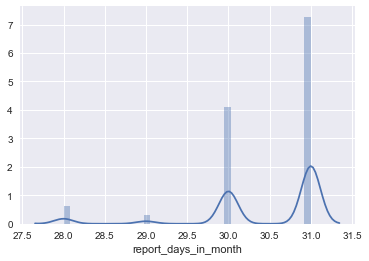

In [31]:
sns.distplot(sup.report_days_in_month, bins=None)

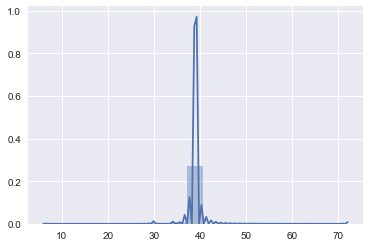

In [32]:
sns.distplot(sup.groupby('report_pwsid').count().iloc[::,:1:], bins=None)

In [33]:
all_pwsid = sup.report_pwsid.unique().tolist()

In [34]:
sup[sup.report_pwsid == all_pwsid[0]].shape

(37, 14)

In [35]:
sup['report_date'] = pd.to_datetime(sup.report_date)

In [36]:
sup[sup.report_pwsid == all_pwsid[0]].sort_values('report_date')
sup.head(3)

,report_agency_name,report_pwsid,report_date,report_days_in_month,report_population,report_percent_residential,report_production_calculated,report_irr_area_sf,report_eto,Residential_Production,Target_Production,PWSID,Medium,Medium_val
0,"Corcoran, City of",CA1610004,2017-02-15,28,24154,0.85,81690000.0,8692999.0,1.82513,69436500.0,4.506662e+07,CA1610004,"Estimate; Total: - $35,000 to $39,999",0.569151
1,"Corcoran, City of",CA1610004,2017-03-15,31,24154,0.85,104720000.0,8692999.0,3.91280,89012000.0,5.805350e+07,CA1610004,"Estimate; Total: - $35,000 to $39,999",0.569151
2,"Corcoran, City of",CA1610004,2017-04-15,30,24154,0.85,120710000.0,8692999.0,5.63691,102603500.0,6.415892e+07,CA1610004,"Estimate; Total: - $35,000 to $39,999",0.569151


In [37]:
sup.Medium.unique().tolist()

[u'Estimate; Total: - $35,000 to $39,999',
 u'Estimate; Total: - $100,000 to $124,999',
 u'Estimate; Total: - $20,000 to $24,999',
 u'Estimate; Total: - $45,000 to $49,999',
 u'Estimate; Total: - $60,000 to $74,999',
 u'Estimate; Total: - $75,000 to $99,999',
 u'Estimate; Total: - $30,000 to $34,999',
 u'Estimate; Total: - $50,000 to $59,999',
 u'Estimate; Total: - $40,000 to $44,999',
 u'Estimate; Total: - $125,000 to $149,999',
 u'Estimate; Total: - $150,000 to $199,999',
 u'Estimate; Total: - $25,000 to $29,999',
 u'Estimate; Total: - $200,000 or more',
 u'Estimate; Total: - $15,000 to $19,999']

In [38]:
sup.Medium = sup.Medium.map(lambda x: x.replace("Estimate; Total: - ", ''))

In [39]:
listforcolors = [ u'$15,000 to $19,999',
  u'$20,000 to $24,999',
  u'$25,000 to $29,999',
  u'$30,000 to $34,999',
  u'$35,000 to $39,999',
  u'$40,000 to $44,999',
  u'$45,000 to $49,999',
  u'$50,000 to $59,999',
  u'$60,000 to $74,999',
  u'$75,000 to $99,999',
  u'$100,000 to $124,999',
  u'$125,000 to $149,999',
  u'$150,000 to $199,999',
  u'$200,000 or more',]

In [40]:
for i in sup.index:
    sup.loc[i, 'color'] = listforcolors.index(sup.loc[i, "Medium"])

In [41]:
summer = [6,7,8]
winter = [12,1,2]
spring = [3,4,5]
autumn = [9,10,11]
seasons = [winter, spring, summer, autumn]

In [42]:
seasons= {'winter':winter,'spring':spring,'summer':summer, 'autumn':autumn}

In [43]:
for i in seasons:
    print i
    print seasons[i]

autumn
[9, 10, 11]
spring
[3, 4, 5]
winter
[12, 1, 2]
summer
[6, 7, 8]


In [44]:
sup.to_csv('Census_Data/Water_District_Historical.csv')

In [43]:
### Get last year from  seotember 2016 to the last record in 2017 
sup_2017 = sup[(sup.report_date > '2016-9-01') & (sup.report_date< '2018-01-01')].sort_values('report_date')

In [44]:
print sup_2017.shape
print len(sup_2017.PWSID.unique())
print len(sup_2017.report_pwsid.unique())

(4499, 15)
381
381


In [45]:
count = 0
for s in seasons:
    #print s, type(s)
    sup_2017_season = sup_2017[sup_2017.report_date.dt.month.isin(seasons[s])].groupby('report_pwsid').mean().iloc[::,6:8:].copy(deep=True)
    #print sup_2017_season.shape
    sup_2017_season.reset_index(inplace=True)
    #print sup_2017_season.shape
    sup_2017_season.rename(columns={'Residential_Production':'Residential_Production_17_mean_'+s,'Target_Production':'Target_Production_17_mean_'+s}, inplace=True)
    #s#up_2017_win = sup_2017_season.merge(sup, on= 'report_pwsid', how = 'inner')
    if count==0:
        tot_2017 = sup_2017_season.merge(sup_2017, on= 'report_pwsid', how = 'inner').copy(deep=True)
        #print tot_2017.shape
    else:
        tot_2017 = sup_2017_season.merge(tot_2017, on= 'report_pwsid', how = 'inner')
    count+=1
print tot_2017.shape
print len(tot_2017.report_pwsid.unique().tolist())
tot_2017.head(3)

(4435, 23)
371


,report_pwsid,Residential_Production_17_mean_summer,Target_Production_17_mean_summer,Residential_Production_17_mean_winter,Target_Production_17_mean_winter,Residential_Production_17_mean_spring,Target_Production_17_mean_spring,Residential_Production_17_mean_autumn,Target_Production_17_mean_autumn,report_agency_name,report_date,report_days_in_month,report_population,report_percent_residential,report_production_calculated,report_irr_area_sf,report_eto,Residential_Production,Target_Production,PWSID,Medium,Medium_val,color
0,CA0110001,986132500.0,1.178623e+09,5.600733e+08,6.984581e+08,7.147147e+08,1.008298e+09,730970000.0,8.705424e+08,Alameda County Water District,2016-09-15,30,349000,0.67,1.281000e+09,185999357.0,4.84460,858270000.0,1.022792e+09,CA0110001,"$100,000 to $124,999",0.59788,10.0
1,CA0110001,986132500.0,1.178623e+09,5.600733e+08,6.984581e+08,7.147147e+08,1.008298e+09,730970000.0,8.705424e+08,Alameda County Water District,2016-10-15,31,349000,0.67,1.122000e+09,185999357.0,2.86433,751740000.0,8.592957e+08,CA0110001,"$100,000 to $124,999",0.59788,10.0
2,CA0110001,986132500.0,1.178623e+09,5.600733e+08,6.984581e+08,7.147147e+08,1.008298e+09,730970000.0,8.705424e+08,Alameda County Water District,2016-11-15,30,349000,0.67,8.700000e+08,185999357.0,1.66591,582900000.0,7.295397e+08,CA0110001,"$100,000 to $124,999",0.59788,10.0


In [46]:
count = 0
for s in seasons:
    #print s, type(s)
    sup_2017_season = sup_2017[sup_2017.report_date.dt.month.isin(seasons[s])].groupby('report_pwsid').sum().iloc[::,6:8:].copy(deep=True)
    #print sup_2017_season.shape
    sup_2017_season.reset_index(inplace=True)
    #print sup_2017_season.shape
    sup_2017_season.rename(columns={'Residential_Production':'Residential_Production_17_tot_'+s,'Target_Production':'Target_Production_17_tot_'+s}, inplace=True)
    #s#up_2017_win = sup_2017_season.merge(sup, on= 'report_pwsid', how = 'inner')
    tot_2017 = sup_2017_season.merge(tot_2017, on= 'report_pwsid', how = 'inner')
    count+=1
print len(tot_2017.report_pwsid.unique().tolist())
tot_2017.head(3)

371


,report_pwsid,Residential_Production_17_tot_summer,Target_Production_17_tot_summer,Residential_Production_17_tot_winter,Target_Production_17_tot_winter,Residential_Production_17_tot_spring,Target_Production_17_tot_spring,Residential_Production_17_tot_autumn,Target_Production_17_tot_autumn,Residential_Production_17_mean_summer,Target_Production_17_mean_summer,Residential_Production_17_mean_winter,Target_Production_17_mean_winter,Residential_Production_17_mean_spring,Target_Production_17_mean_spring,Residential_Production_17_mean_autumn,Target_Production_17_mean_autumn,report_agency_name,report_date,report_days_in_month,report_population,report_percent_residential,report_production_calculated,report_irr_area_sf,report_eto,Residential_Production,Target_Production,PWSID,Medium,Medium_val,color
0,CA0110001,2.958398e+09,3.535869e+09,1.680220e+09,2.095374e+09,2.144144e+09,3.024893e+09,2.192910e+09,2.611627e+09,986132500.0,1.178623e+09,5.600733e+08,6.984581e+08,7.147147e+08,1.008298e+09,730970000.0,8.705424e+08,Alameda County Water District,2016-09-15,30,349000,0.67,1.281000e+09,185999357.0,4.84460,858270000.0,1.022792e+09,CA0110001,"$100,000 to $124,999",0.59788,10.0
1,CA0110001,2.958398e+09,3.535869e+09,1.680220e+09,2.095374e+09,2.144144e+09,3.024893e+09,2.192910e+09,2.611627e+09,986132500.0,1.178623e+09,5.600733e+08,6.984581e+08,7.147147e+08,1.008298e+09,730970000.0,8.705424e+08,Alameda County Water District,2016-10-15,31,349000,0.67,1.122000e+09,185999357.0,2.86433,751740000.0,8.592957e+08,CA0110001,"$100,000 to $124,999",0.59788,10.0
2,CA0110001,2.958398e+09,3.535869e+09,1.680220e+09,2.095374e+09,2.144144e+09,3.024893e+09,2.192910e+09,2.611627e+09,986132500.0,1.178623e+09,5.600733e+08,6.984581e+08,7.147147e+08,1.008298e+09,730970000.0,8.705424e+08,Alameda County Water District,2016-11-15,30,349000,0.67,8.700000e+08,185999357.0,1.66591,582900000.0,7.295397e+08,CA0110001,"$100,000 to $124,999",0.59788,10.0


In [47]:
listforcolors

[u'$15,000 to $19,999',
 u'$20,000 to $24,999',
 u'$25,000 to $29,999',
 u'$30,000 to $34,999',
 u'$35,000 to $39,999',
 u'$40,000 to $44,999',
 u'$45,000 to $49,999',
 u'$50,000 to $59,999',
 u'$60,000 to $74,999',
 u'$75,000 to $99,999',
 u'$100,000 to $124,999',
 u'$125,000 to $149,999',
 u'$150,000 to $199,999',
 u'$200,000 or more']

In [48]:
seasons_name = tot_2017.columns.tolist()

In [49]:
tot_2017.drop_duplicates(subset=['report_pwsid']).shape

(371, 31)

In [50]:
by_tim_seas = ['_17_mean_autumn',
               '_17_mean_winter',
               '_17_mean_spring',
               '_17_mean_summer']
by_tim_tot = ['_17_tot_autumn',
               '_17_tot_winter',
               '_17_tot_spring',
               '_17_tot_summer']

In [51]:

import colorlover as cl
from IPython.display import HTML
HTML(cl.to_html( cl.scales['4']['div']['RdYlBu'] ))

In [52]:
cl.scales['4']['div']['RdYlBu']

['rgb(215,25,28)', 'rgb(253,174,97)', 'rgb(171,217,233)', 'rgb(44,123,182)']

In [53]:
color_s = {'_17_mean_autumn':['Autumn 2016','rgb(171,217,233)'],
               '_17_mean_winter':['Winter 2017','rgb(44,123,182)'],
               '_17_mean_spring':['Spring 2017','rgb(253,174,97)'],
               '_17_mean_summer':['Summer 2017','rgb(215,25,28)']}

In [54]:
color_s = {'_17_mean_autumn':['Autumn 2016','brown'],
               '_17_mean_winter':['Winter 2017','rgb(44,123,182)'],
               '_17_mean_spring':['Spring 2017','green'],
               '_17_mean_summer':['Summer 2017','orange']}

Feedback on water rate analyses 

- aggregate by season / year. Take the median usage for Summer 2017 (June / July / August), Spring 2017 (March, April, May), Winter 16-17 etc

- scatterplot of percent over/under efficiency goal in summer 2017 and neighborhood income

- add in typical customer bill into the analysis. Typical means single family residential at 15 ccf.

In [55]:
by_tim_seas

['_17_mean_autumn', '_17_mean_winter', '_17_mean_spring', '_17_mean_summer']

In [56]:
#tot_2017['x_medium'] = tot_2017['Medium'].map(lambda x:listforcolors.index(x))
tot_2017['x_medium'] = tot_2017['Medium'].map(lambda x:x.replace(',000','k'))
tot_2017['x_medium'] = tot_2017['x_medium'].map(lambda x:x.replace('$',''))
tot_2017['x_medium'] = tot_2017['x_medium'].map(lambda x:x.replace(',999','.9k'))
tot_2017['x_medium'] = tot_2017['x_medium'].map(lambda x: '$' + x)

re_tot_2017 = tot_2017.drop_duplicates(subset=['report_pwsid']).copy(deep=True)
re_tot_2017 = re_tot_2017.dropna(subset = ['Target_Production'])

print re_tot_2017.shape

(369, 32)


In [57]:
import plotly.plotly as py
import plotly.graph_objs as go 
import copy

from datetime import datetime


data = []

for s in by_tim_seas:

    trace_actual = go.Scatter(x=re_tot_2017['Residential_Production'+s],
                            y=re_tot_2017['Target_Production'+s],
                            visible=True,
                            text= re_tot_2017['PWSID'] + ' - '+ re_tot_2017['report_agency_name'],
                            name = color_s[s][0],
                            marker=dict(size=16,
                                        color = color_s[s][1],
                                        line= dict(width=1),
                                       ),
                            opacity=.65,
                            legendgroup = s,
                            #showlegend = show_leg,

                            mode='markers')
    data.append(trace_actual)

line_1 = [dict(type='line',
                 xref='x', yref='y',
                 x0=0, y0=0, 
                 x1=25000000000, y1 = 25000000000, 
                 opacity=.55,
                 line=dict(color='lightgrey'),
                 fillcolor='#B8F7D4')]
                
layout = dict(title='Mean Water Performance by Season', showlegend=True,
              shapes = line_1,
              width=900,
              height=700,
              yaxis=dict(
                        autorange = True,
                        #range=[0, 28000000000],
                        title='Target Total Gallons',
                        titlefont=dict(
                                        family='Arial, sans-serif',
                                        size=18,
                                        color='lightgrey'
                        ),), 
              xaxis=dict(
                        autorange = True,
                        #range=[0, 28000000000],
                        title='Real Total Gallons',
                        titlefont=dict(
                                        family='Arial, sans-serif',
                                        size=18,
                                        color='lightgrey'
            
                        ),
                        ),
              legend = dict(orientation = 'v', 
                            traceorder='grouped'),
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='1_Water_2017_Season_Legend')

In [58]:
import plotly.plotly as py
import plotly.graph_objs as go 
import copy

from datetime import datetime


data = []

for i in listforcolors:
    #print sup[sup['Medium']==i]['Residential_Production'].shape
    trace_actual = go.Scatter(x=sup[sup['Medium']==i]['Residential_Production'],
                            y=sup[sup['Medium']==i]['Target_Production'],
                            visible=True,
                            text= sup[sup['Medium']==i]['PWSID'],
                            name=i,
                            marker=dict(size=16,
                                        line= dict(width=1),
                                        cmax=13,
                                        cmin=0,
                                        color= sup[sup['Medium']==i].color.tolist(),
                                        colorscale='Jet',),
                            opacity=.65,
                            mode='markers')
    data.append(trace_actual)

    
trace1 = go.Scatter(
    x=[0, 28000000000],
    y=[0, 28000000000],
    mode='lines',
    line = dict(color= 'gray'),
    #name='Lines, Markers and Text',
    #text=['Text A', 'Text B', 'Text C'],
    #textposition='top'
)    
data.append(trace1)
menu = []
other=[]
vis = []

for i in listforcolors:
    vis.append(False)
    other.append(True)
    
count=0
vis.append(True)
other.append(True)
for i in listforcolors:
    use_vis = copy.deepcopy(vis)
    use_vis[count]=True
    #print use_vis
    menu.append(dict(label = i,
                 method = 'update',
                 args = [{'visible': use_vis}]))
    count+=1
menu.append(dict(label = 'All',
                 method = 'update',
                 args = [{'visible': other}]))

updatemenus2 = list([
                    dict(active=0,
                         buttons=list(menu)
                    )
                ])
                         
layout = dict(title='Water_Performance', showlegend=False,
              width=900,
              height=700,
              yaxis=dict(
                        #range=[0, 28000000000],
                        title='Target Total Gallons',
                        titlefont=dict(
                                        family='Arial, sans-serif',
                                        size=18,
                                        color='lightgrey'
                        ),), 
              xaxis=dict(
                        #range=[0, 28000000000],
                        title='Real Total Gallons',
                        titlefont=dict(
                                        family='Arial, sans-serif',
                                        size=18,
                                        color='lightgrey'
            
                        ),
                        ),
              updatemenus=updatemenus2)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='2_Water_perfromance_w_Income_dropdown')

In [59]:
import plotly.plotly as py
import plotly.graph_objs as go 

from datetime import datetime
test ='CA4110016'
#test ='CA1510003'

trace_actual = go.Scatter(x=sup[sup.report_pwsid == test].sort_values('report_date')['report_date'],
                        y=sup[sup.report_pwsid == test].sort_values('report_date')['Residential_Production'],
                        visible=True,
                        text=  test + ' - ' + sup[sup.report_pwsid ==test]['report_agency_name'],
                        name='Residential_Production',
                        line=dict(color='#33CFA5'))
trace_target = go.Scatter(x=sup[sup.report_pwsid == test].sort_values('report_date')['report_date'],
                           y=sup[sup.report_pwsid == test].sort_values('report_date')['Target_Production'],
                           name='Target_Production',
                           text=  test + ' - ' + sup[sup.report_pwsid == test]['report_agency_name'],
                           visible=True,
                           line=dict(color='#F06A6A', dash='dash'))
data = [trace_actual, trace_target]


updatemenus = list([
    dict(active=0,
         buttons=list([   
            dict(label = 'Both',
                 method = 'update',
                 args = [{'visible': [True, True]},
                         {'title': 'Both',}]),
            dict(label = 'Actual',
                 method = 'update',
                 args = [{'visible': [True, False]},
                         {'title': 'Actual',}]),
            dict(label = 'Target',
                 method = 'update',
                 args = [{'visible': [False, True]},
                         {'title': 'Target'}]),
        ]),
    )
])

layout = dict(title='Water_Performance', showlegend=True,
              yaxis=dict(
        title='Total Gallons',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='lightgrey'
        ),
    ), updatemenus=updatemenus)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='3_Water_Performance_Timeseries')

import plotly.plotly as py
import plotly.graph_objs as go 

from datetime import datetime
data=[]
for i in all_pwsid[:5]:
    trace_actual = go.Scatter(x=sup[sup.report_pwsid == i].sort_values('report_date')['report_date'],
                            y=sup[sup.report_pwsid == i].sort_values('report_date')['Residential_Production'],
                            visible=True,
                            text=  i + ' - ' + sup[sup.report_pwsid == i]['report_agency_name'],
                            name='Residential_Production',
                            line=dict(color='#33CFA5'))
    trace_target = go.Scatter(x=sup[sup.report_pwsid == i].sort_values('report_date')['report_date'],
                               y=sup[sup.report_pwsid == i].sort_values('report_date')['Target_Production'],
                               name='Target_Production',
                               text=  i + ' - ' + sup[sup.report_pwsid == i]['report_agency_name'],
                               visible=True,
                               line=dict(color='#F06A6A', dash='dash'))
    data.append(trace_actual)
    data.append(trace_target)

layout = dict(title='Water_Performance', showlegend=False,
              yaxis=dict(
        title='Total Gallons',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='lightgrey'
        ),
    ), #updatemenus=updatemenus
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Water_Performance_All')

In [60]:
by_tim_seas

['_17_mean_autumn', '_17_mean_winter', '_17_mean_spring', '_17_mean_summer']

In [61]:
color_s

{'_17_mean_autumn': ['Autumn 2016', 'brown'],
 '_17_mean_spring': ['Spring 2017', 'green'],
 '_17_mean_summer': ['Summer 2017', 'orange'],
 '_17_mean_winter': ['Winter 2017', 'rgb(44,123,182)']}

In [62]:
name_seas = {'_17_tot_autumn': ['Autumn 2016', 'rgb(171,217,233)'], 
                 '_17_tot_winter' : ["Winter 2017", 'rgb(44,123,182)'],
                 '_17_tot_spring' : ['Spring 2017','rgb(253,174,97)',],
                 '_17_tot_summer':['Summer 2017', 'rgb(215,25,28)']}

In [63]:
name_seas = {'_17_tot_autumn':['Autumn 2016','brown'],
               '_17_tot_winter':['Winter 2017','rgb(44,123,182)'],
               '_17_tot_spring':['Spring 2017','green'],
               '_17_tot_summer':['Summer 2017','orange']}

trace0.help('customdata')
trace0.help('customdatasrc')
trace0.help('hoverinfo')
trace0.help('hoverinfosrc')

In [64]:
by_tim_seas
test = re_tot_2017['report_pwsid'],
data = []
for s in by_tim_tot:
    trace0 = go.Box(
        y = re_tot_2017['Residential_Production'+s]/re_tot_2017['Target_Production'+s],
        name = name_seas[s][0],
        jitter = 0.3,
        pointpos = -1.8,
        boxpoints = 'all',
        hoverinfo =  'customdata',
        #hoverinfosrc = 'customdata',
        customdata = re_tot_2017['report_pwsid'],
        #hoverinfosrc = re_tot_2017['report_pwsid'],
        #textsrc = re_tot_2017['report_pwsid'],
        #ids = re_tot_2017['report_pwsid'],
        #textsrc = re_tot_2017['report_pwsid'],
        #hoverinfosrc = test,
        
        #hoverinfosrc =  re_tot_2017['report_pwsid'],
        #customdatasrc = re_tot_2017['report_pwsid'],
        #idssrc = re_tot_2017['report_pwsid'],
        
        marker = dict(
            color = name_seas[s][1],
            opacity=0.5,
            line= dict(width=1),),
        line = dict(
            color = name_seas[s][1])
    )
    data.append(trace0)


layout = go.Layout(
    title = "Water Efficiency by Season"
)

fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename = "4_Water_Efficiency_Season_BOX")

In [65]:
forscale =[]
for i in listforcolors:
    
    forscale.append(re_tot_2017[re_tot_2017['Medium']==i].x_medium.unique()[0])
forscale

[u'$15k to 19.9k',
 u'$20k to 24.9k',
 u'$25k to 29.9k',
 u'$30k to 34.9k',
 u'$35k to 39.9k',
 u'$40k to 44.9k',
 u'$45k to 49.9k',
 u'$50k to 59.9k',
 u'$60k to 74.9k',
 u'$75k to 99.9k',
 u'$100k to 124.9k',
 u'$125k to 149.9k',
 u'$150k to 199.9k',
 u'$200k or more']

In [66]:
import plotly.plotly as py
import plotly.graph_objs as go 
import copy

from datetime import datetime
tryT = re_tot_2017.color.unique().tolist()
tryT.sort()
tryT

s = '_17_tot_summer'
data = []

for i in listforcolors:
    
    trace_actual = go.Scatter(x=re_tot_2017[re_tot_2017['Medium']==i]['Residential_Production'+s],
                            y=re_tot_2017[re_tot_2017['Medium']==i]['Target_Production'+s],
                            visible=True,
                            text= re_tot_2017[re_tot_2017['Medium']==i]['PWSID'] +' - '+ re_tot_2017[re_tot_2017['Medium']==i]['report_agency_name'],
                            name=i,
                            opacity = 0.65,
                            marker=dict(size=16,
                                        line= dict(width=1),
                                        
                                        colorbar=dict(
                                                        title='Median Household Income',
                bordercolor= 'lightgrey',
                outlinecolor = 'lightgrey',
                                                        ticktext = forscale,
                                                        tickmode = 'array',
                                                        tickvals = tryT,
                                                    ),
                                        cmax=13,
                                        cmin=0,
                                        color= re_tot_2017[re_tot_2017['Medium']==i].color.tolist(),
                                        colorscale='Jet',),
                            mode='markers')
    data.append(trace_actual)

    
trace1 = go.Scatter(
    x=[0, 35000000000],
    y=[0, 35000000000],
    mode='lines',
    line = dict(color= 'gray'),
    #name='Lines, Markers and Text',
    #text=['Text A', 'Text B', 'Text C'],
    #textposition='top'
)    
data.append(trace1)
menu = []
other=[]
vis = []

for i in listforcolors:
    vis.append(False)
    other.append(True)
    
count=0
vis.append(True)
other.append(True)
for i in listforcolors:
    use_vis = copy.deepcopy(vis)
    use_vis[count]=True
    menu.append(dict(label = i,
                 method = 'update',
                 args = [{'visible': use_vis}]))
    count+=1
menu.append(dict(label = 'All',
                 method = 'update',
                 args = [{'visible': other}]))

updatemenus2 = list([
                    dict(active=14,
                         buttons=list(menu)
                    )
                ])
                         
layout = dict(title='Water Performance Summer 2017 w/ Household Median Income', showlegend=False,
              width=900,
              height=700,
              #hovermode ='x',
              yaxis=dict(
                        #range=[0, 28000000000],
                        title='Target Total Gallons',
                        titlefont=dict(
                                        family='Arial, sans-serif',
                                        size=18,
                                        color='lightgrey'
                        ),), 
              xaxis=dict(
                        #range=[0, 28000000000],
                        title='Real Total Gallons',
                        titlefont=dict(
                                        family='Arial, sans-serif',
                                        size=18,
                                        color='lightgrey'
            
                        ),
                        ),
              updatemenus=updatemenus2)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='5_Water_Efficiency_Summer_by_Income')

In [67]:
import plotly.plotly as py
import plotly.graph_objs as go 
import copy

from datetime import datetime

s = '_17_tot_summer'
data = []
the_c = 0
for s in by_tim_tot:
    if the_c==3:
        vis_bool=True
    else:
        vis_bool = False
    
    for i in listforcolors:
    #i=  listforcolors[5]
        trace_actual = go.Scatter(x= re_tot_2017[re_tot_2017['Medium']==i]['x_medium'],
                                y=re_tot_2017[re_tot_2017['Medium']==i]['Residential_Production'+s]/re_tot_2017[re_tot_2017['Medium']==i]['Target_Production'+s],
                                visible = vis_bool,
                                text= re_tot_2017[re_tot_2017['Medium']==i]['PWSID'] +' - '+ re_tot_2017[re_tot_2017['Medium']==i]['report_agency_name'],
                                name='Water Performance'+ name_seas[s][0] + 'w/ Household Median Income',
                                marker=dict(size=16,
                                            cmax=13,
                                            cmin=0,
                                            color= re_tot_2017[re_tot_2017['Medium']==i].color.tolist(),
                                            line= dict(width=1),
                                            colorscale='Jet',),
                                mode='markers',
                                opacity = .55,)
        data.append(trace_actual)
    the_c+=1

    

menu = []
other=[]
vis = []

for s in by_tim_tot:
    for i in listforcolors:
        vis.append(False)
        other.append(True)
count=0

for s in by_tim_tot:
    use_vis = copy.deepcopy(vis)
    for i in listforcolors:
        use_vis[count]=True
        count+=1
    menu.append(dict(label = name_seas[s][0],
                 method = 'update',
                 args = [{'visible': use_vis}]))


updatemenus2 = list([
                    dict(active=3,
                         buttons=list(menu),
                         pad = {'r': 20, 't': 20},
                         x = 1,
                         xanchor = 'right',
                         yanchor = 'top',
                    ),
                        
                ])
                
        
layout = dict(title='Water Seasonal Performance in 2017 w/ Household Median Income', showlegend=False,
              #width=900,
              #height=700,
              shapes=[dict({
                            'type': 'line',
                            'x0': -.5,
                            'y0': 1,
                            'x1': 13.5,
                            'y1': 1,
                            'line': {
                                'color': 'lightgrey',
                                'width': 2
                            }})],
               annotations=[
                            dict(
                                x=-.5,
                                y=1,
                                xref='x',
                                yref='y',
                                text='Target',
                                arrowcolor = 'lightgrey',
                                opacity = .8,
            
                                showarrow=True,
                                arrowhead=7,
                                ax=100,
                                ay=-200
                            )],
              hovermode ='closest',
              yaxis=dict(
                        #range=[0, 28000000000],
                        title='Water Consumption Efficiency',
                        titlefont=dict(
                                        family='Arial, sans-serif',
                                        size=18,
                                        color='lightgrey'
                        ),), 
              xaxis=dict(
                        #range=[0, 28000000000],
                        title='Median Household Income',
                        
                        #tickvals = range(0,13),
                        #ticktext = listforcolors,
                        titlefont=dict(
                                        family='Arial, sans-serif',
                                        size=18,
                                        color='lightgrey'
            
                        ),
                        ),
              updatemenus=updatemenus2)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='6_Seasonal_Water_Effic_Summer_vs_Income')

In [68]:
len(re_tot_2017.report_agency_name.unique().tolist())

369

In [69]:
#import requests
import plotly.figure_factory as ff
def LSI(s):
    x1 = re_tot_2017['Residential_Production'+s]/re_tot_2017['Target_Production'+s]
    return x1

def the_names(s):
    l1 = name_seas[s][0]
    return l1

def the_text(s):
    l0 = re_tot_2017.PWSID + ' - ' + re_tot_2017.report_agency_name
    return l0

def the_color(s):
    c = name_seas[s][1]
    return c


col = []
hist_data = []
group_labels = []
rug_text_all = []

count=0
for s in by_tim_tot:
    hist_data.append(LSI(s))
    group_labels.append(the_names(s))
    rug_text_all.append(the_text(s))
    col.append(the_color(s))

#, colors=colors,

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, rug_text = rug_text_all, bin_size=5, colors=col)

fig['layout'].update(title='Water Consumption Efficiency Distribution',
                     showlegend=True,
                     shapes=[dict({
                            'type': 'line',
                            'x0': 1,
                            'y0': 0,
                            'x1': 1,
                            'y1': 2,
                            'line': {
                                'color': 'lightgrey',
                                'width': 2
                            }})],
                     annotations=[
                            dict(
                                x=1,
                                y=1.7,
                                xref='x',
                                yref='y',
                                text='Target',
                                arrowcolor = 'lightgrey',
                                opacity = .8,
    
                                showarrow=True,
                                arrowhead=7,
                                ax=60,
                                ay=-35
                            )],
                     
                     plot_bgcolor='rgb(250,250,250)',
                    xaxis = dict(title = 'Water Consumption Efficiency',gridcolor='#FFFFFF',#gridwidth=2
                                ),
              yaxis = dict(title = 'Density', gridcolor='#FFFFFF',
                          ))
# Plot!
py.iplot(fig, filename='7_Seasonal_Water_Effic_Distribution')

In [70]:
cmap = ['#124FCD','#1282CD', '#12B6CD', '#12CEB0', '#11CE7C', '#11CE48',
        '#11CF13', '#43CF10','#78D010', '#AED010', '#D0BD0F', '#D1880F', 
        '#D1520F', '#D11B0E']

In [71]:
re_tot_2017[re_tot_2017['Medium']==s]['Residential_Production']/re_tot_2017[re_tot_2017['Medium']==s]['Target_Production']

Series([], dtype: float64)

In [72]:
listforcolors

[u'$15,000 to $19,999',
 u'$20,000 to $24,999',
 u'$25,000 to $29,999',
 u'$30,000 to $34,999',
 u'$35,000 to $39,999',
 u'$40,000 to $44,999',
 u'$45,000 to $49,999',
 u'$50,000 to $59,999',
 u'$60,000 to $74,999',
 u'$75,000 to $99,999',
 u'$100,000 to $124,999',
 u'$125,000 to $149,999',
 u'$150,000 to $199,999',
 u'$200,000 or more']

In [73]:
s_tot_2017 = tot_2017.dropna(subset = ['Target_Production'])

In [74]:
#import requests
def LSI(s):
    x1 = s_tot_2017[s_tot_2017['Medium']==s]['Residential_Production']/s_tot_2017[s_tot_2017['Medium']==s]['Target_Production']
    return x1

def the_names(s):
    l1 = s_tot_2017[s_tot_2017['Medium']==s]['x_medium'].unique().tolist()[0]
    return l1

def the_text(s):
    l0 = s_tot_2017[s_tot_2017['Medium']==s].PWSID + ' - ' + s_tot_2017[s_tot_2017['Medium']==s].report_agency_name
    return l0

def the_color(s):
    c = cmap[int(s_tot_2017[s_tot_2017['Medium']==s].color.unique().tolist()[0])]
    return c


col = []
hist_data = []
group_labels = []
rug_text_all = []

count=0


for s in listforcolors[:]:
    hist_data.append(LSI(s))
    group_labels.append(the_names(s))
    rug_text_all.append(the_text(s))
    col.append(the_color(s))


fig = ff.create_distplot(hist_data, group_labels, rug_text = rug_text_all, colors=col, show_hist=False, bin_size=5)

fig['layout'].update(title='Water Consumption Efficiency Distribution by Median Household-Income',
                     showlegend=True,
                     shapes=[dict({
                            'type': 'line',
                            'x0': 1,
                            'y0': 0,
                            'x1': 1,
                            'y1': 3.7,
                            'line': {
                                'color': 'lightgrey',
                                'width': 2
                            }})],
                     annotations=[
                            dict(
                                x=1,
                                y=1.7,
                                xref='x',
                                yref='y',
                                text='Target',
                                arrowcolor = 'lightgrey',
                                opacity = .8,
    
                                showarrow=True,
                                arrowhead=7,
                                ax=60,
                                ay=-35
                            )],
                     
                     plot_bgcolor='rgb(250,250,250)',
                    xaxis = dict(title = 'Water Consumption Efficiency',gridcolor='#FFFFFF',#gridwidth=2
                                ),
                      yaxis = dict(title = 'Density', gridcolor='#FFFFFF',
                                  ))
# Plot!
py.iplot(fig, filename='8_Water_Effic_Distribution_by_Income')

In [ ]:
s_tot_2017

In [52]:
2*(1.20)**4

4.1472

In [ ]:
.18+18+18

In [75]:
s_tot_2017.shape

(4411, 32)

In [76]:
re_tot_2017.shape

(369, 32)

In [77]:
s_tot_2017.to_csv('Census_Data/Water_District_Income_2017.csv')

In [78]:
re_tot_2017.to_csv('Census_Data/Water_District_Income_summary.csv')

#import requests
def LSI(i,s):
    x1 = s_tot_2017[s_tot_2017['Medium']==i]['Residential_Production'+s]/s_tot_2017[s_tot_2017['Medium']==i]['Target_Production'+s]
    return x1

def the_names(s):
    l1 = s_tot_2017[s_tot_2017['Medium']==i]['x_medium'].unique().tolist()[0]
    return l1

def the_text(s):
    l0 = s_tot_2017[s_tot_2017['Medium']==i].PWSID + ' - ' + s_tot_2017[s_tot_2017['Medium']==i].report_agency_name
    return l0

def the_color(s):
    c = cmap[int(s_tot_2017[s_tot_2017['Medium']==i].color.unique().tolist()[0])]
    return c


col = []
hist_data = []
group_labels = []
rug_text_all = []

count=0

for s in listforcolors[:]:
    for i in listforcolors[:]:
        hist_data.append(LSI(i))
        group_labels.append(the_names(i))
        rug_text_all.append(the_text(i))
        col.append(the_color(i))


fig = ff.create_distplot(hist_data, group_labels, rug_text = rug_text_all, colors=col, show_hist=False, bin_size=5)

fig['layout'].update(title='Water Consumption Efficiency Distribution',
                     showlegend=True,
                     shapes=[dict({
                            'type': 'line',
                            'x0': 1,
                            'y0': 0,
                            'x1': 1,
                            'y1': 3.7,
                            'line': {
                                'color': 'lightgrey',
                                'width': 2
                            }})],
                     annotations=[
                            dict(
                                x=1,
                                y=1.7,
                                xref='x',
                                yref='y',
                                text='Target',
                                arrowcolor = 'lightgrey',
                                opacity = .8,
    
                                showarrow=True,
                                arrowhead=7,
                                ax=60,
                                ay=-35
                            )],
                     
                     plot_bgcolor='rgb(250,250,250)',
                    xaxis = dict(title = 'Water Consumption Efficiency',gridcolor='#FFFFFF',#gridwidth=2
                                ),
                      yaxis = dict(title = 'Density', gridcolor='#FFFFFF',
                                  ))
# Plot!
py.iplot(fig, filename='Efficiency distribution')